In [45]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import time

samples = np.fromfile('../data/neighbouring_ch.fc32', dtype=np.complex64)

sample_rate = 768000
center_freq = 160425000
x = samples
x = x[250_000:500_000]

# PLOT THE PSD
""" fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq)
peaks = signal.find_peaks(psd[0], prominence=0.00000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show() """

t = np.arange(len(x))/sample_rate
h = signal.firwin(501, 0.005, pass_zero=True)
# p = np.exp(2j*np.pi*t*86309)
p = np.exp(2j*np.pi*t*-163575)

start = time.time()
x = x * p
x = signal.convolve(x, h, 'same')
end = time.time()

# PLOT THE PSD
""" fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq-163575)
peaks = signal.find_peaks(psd[0], prominence=0.00000000001)
for peak, prominence in zip(peaks[0], peaks[1]["prominences"]):
    peak_freq =  ((peak/1024)*sample_rate) + (center_freq-(sample_rate/2))
    plt.annotate(peak_freq, xy=( peak_freq , 10 * np.log10(prominence)))
plt.show() """

x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

print(end - start)

#x = 10 * np.log10(x)
#psd = plt.psd(x, NFFT=1024, Fs=sample_rate, Fc=center_freq)

sample_rate = sample_rate/100




0.04941844940185547


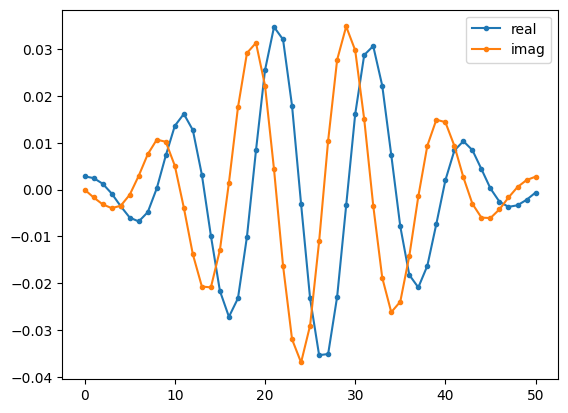

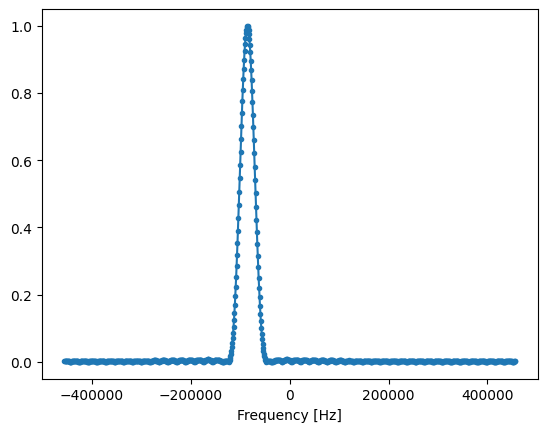

In [20]:
# (h was found using the first code snippet)

num_taps = 51 # it helps to use an odd number of taps
cut_off = 3000 # Hz
sample_rate = 912_000 #Hz
# create our low pass filter
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = -86_000 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()